# Importing Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler







# Connecting To Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and Reading Dataset

In [64]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
df = pd.read_csv("Mall_Customers.csv",index_col=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


# Understanding the Data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [66]:
df.shape

(200, 4)

In [67]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [68]:
df.apply(lambda col: col.unique())

Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object

In [69]:
#cheching for count of zeros
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Gender  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Annual Income (k$)  is :  0
Count of zeros in column  Spending Score (1-100)  is :  0


# Preprocessing

In [70]:
labelEncoder = LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df  

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


# Outliers Detection

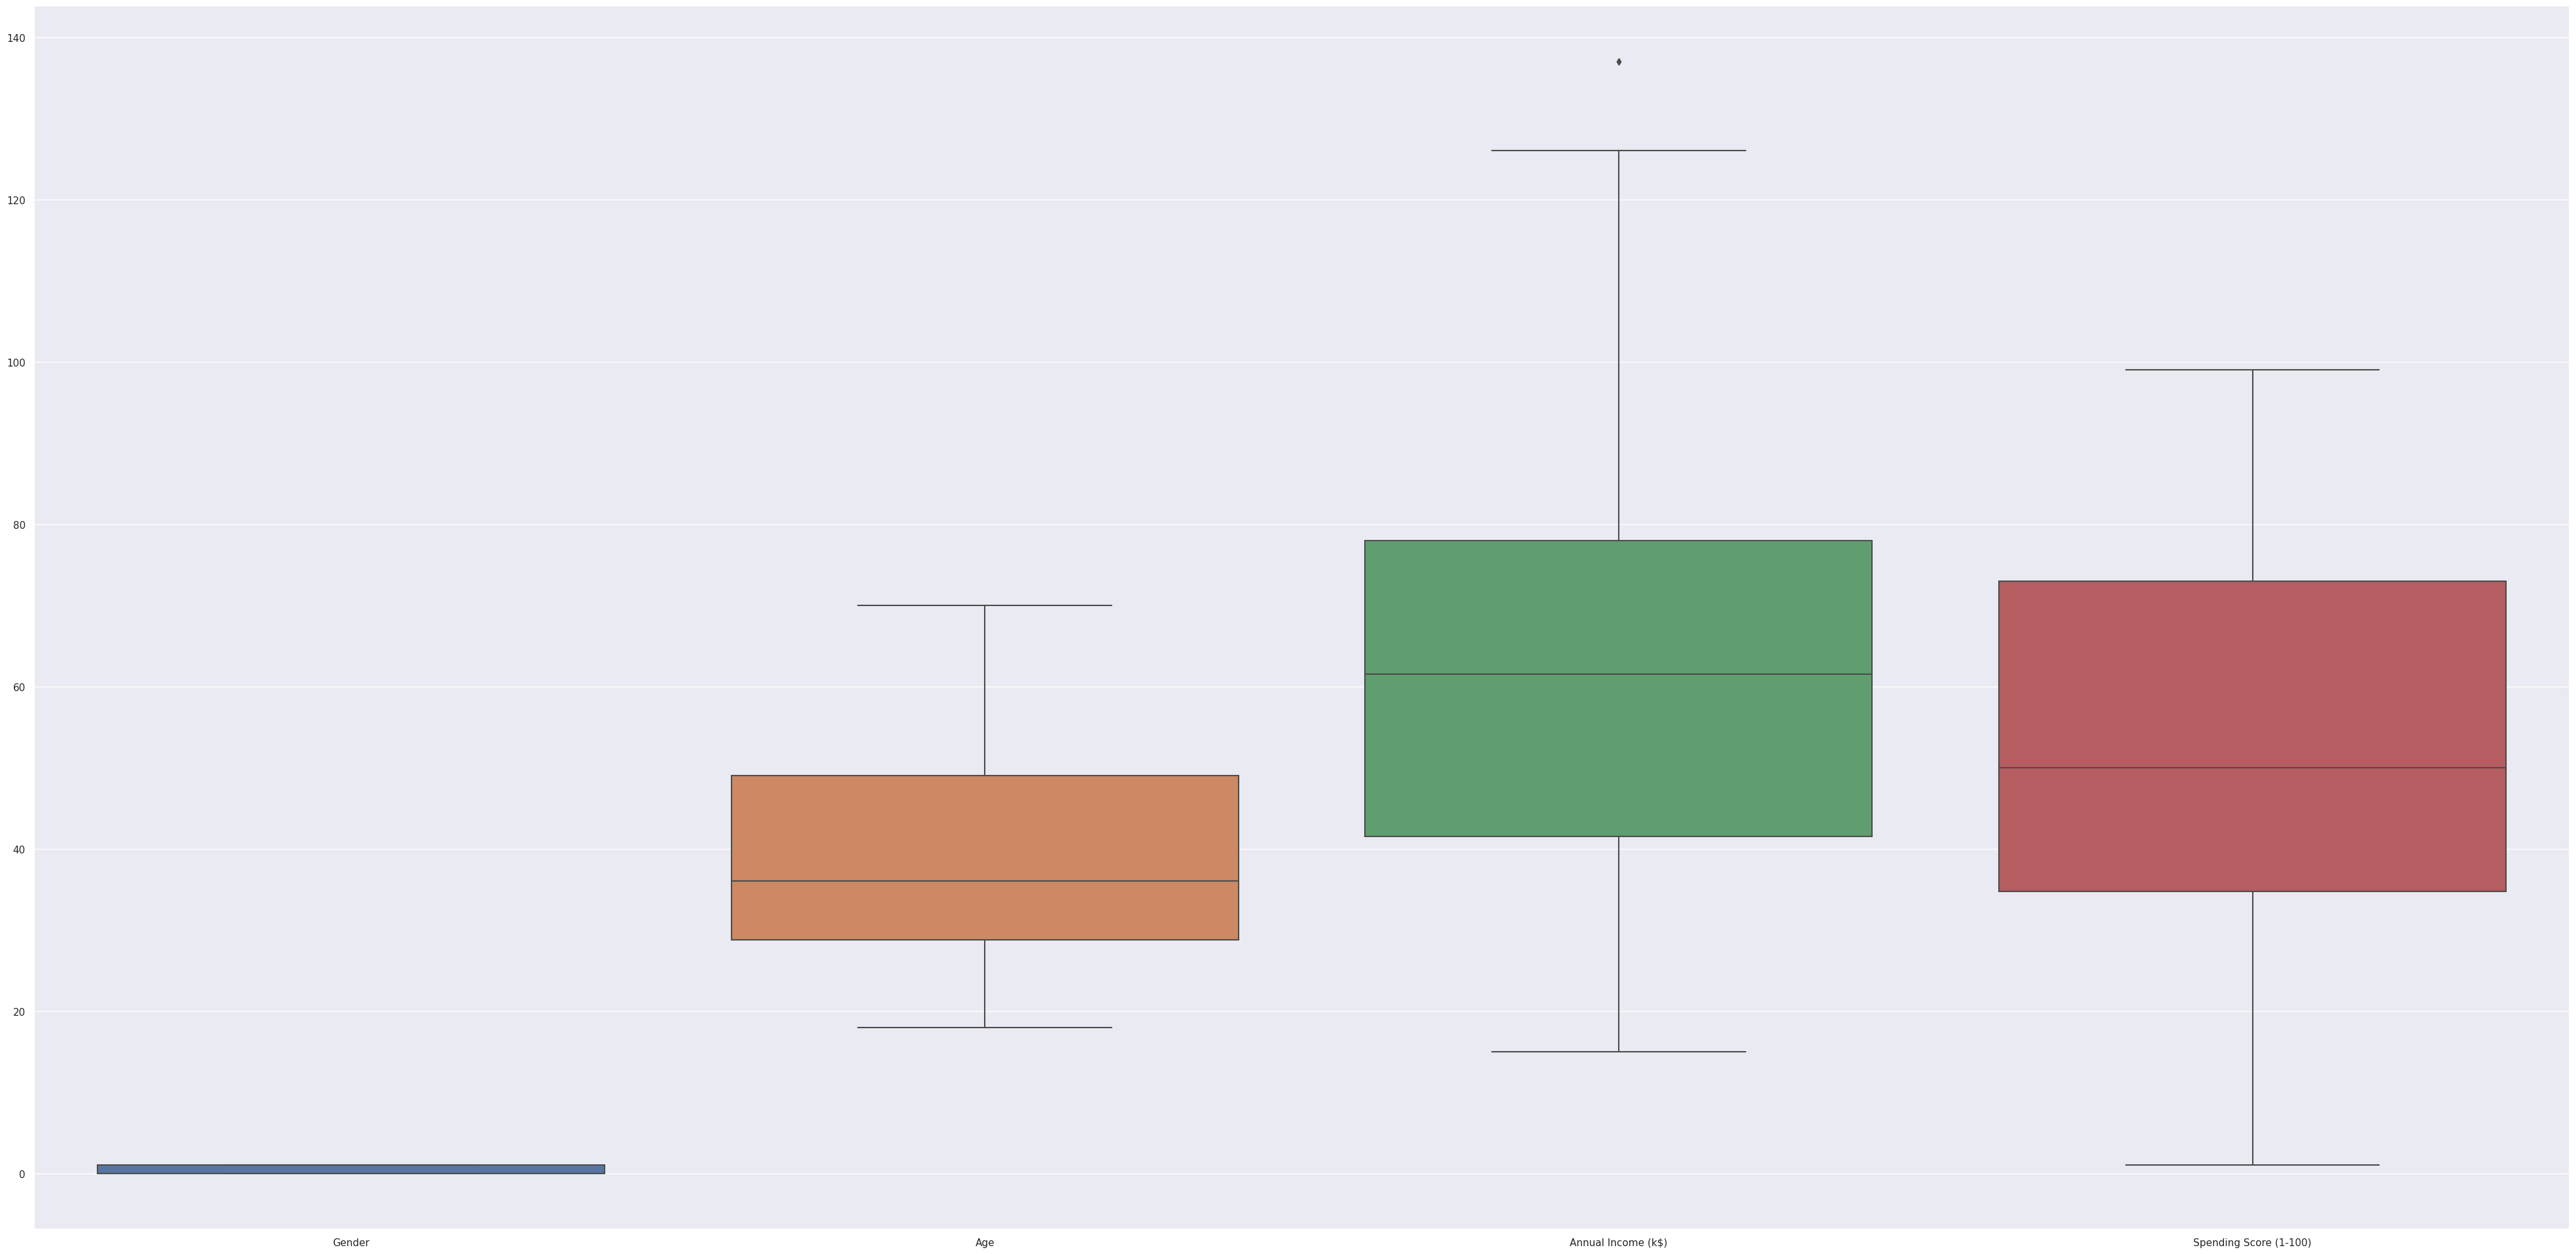

In [71]:
#box-plot
sns.set(rc={'figure.figsize':(50,24.27)})
display = sns.boxplot(data = df)
plt.show()

In [72]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [73]:
#detecting outliers using IQR
#replacing outliers with null values
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
min = q1-(1.5*iqr)
max = q3+(1.5*iqr)

for col in df.columns:
   if col == 'date':
    continue
   print("col: ",col,"\t\t", df.loc[df[col] > max[col],col].shape)
   df[col].mask(((df[col] < min[col]) | (df[col] > max[col])), np.nan, inplace=True)

col:  Gender 		 (0,)
col:  Age 		 (0,)
col:  Annual Income (k$) 		 (2,)
col:  Spending Score (1-100) 		 (0,)


In [74]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15.0,39
2,1,21,15.0,81
3,0,20,16.0,6
4,0,23,16.0,77
5,0,31,17.0,40
...,...,...,...,...
196,0,35,120.0,79
197,0,45,126.0,28
198,1,32,126.0,74


In [75]:
df.isnull().sum(axis=0)

Gender                    0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64

# Removing Outliers

In [76]:
df = df.drop(199, axis=0)
df = df.drop(200, axis=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15.0,39
2,1,21,15.0,81
3,0,20,16.0,6
4,0,23,16.0,77
5,0,31,17.0,40
...,...,...,...,...
194,0,38,113.0,91
195,0,47,120.0,16
196,0,35,120.0,79


# Correlation

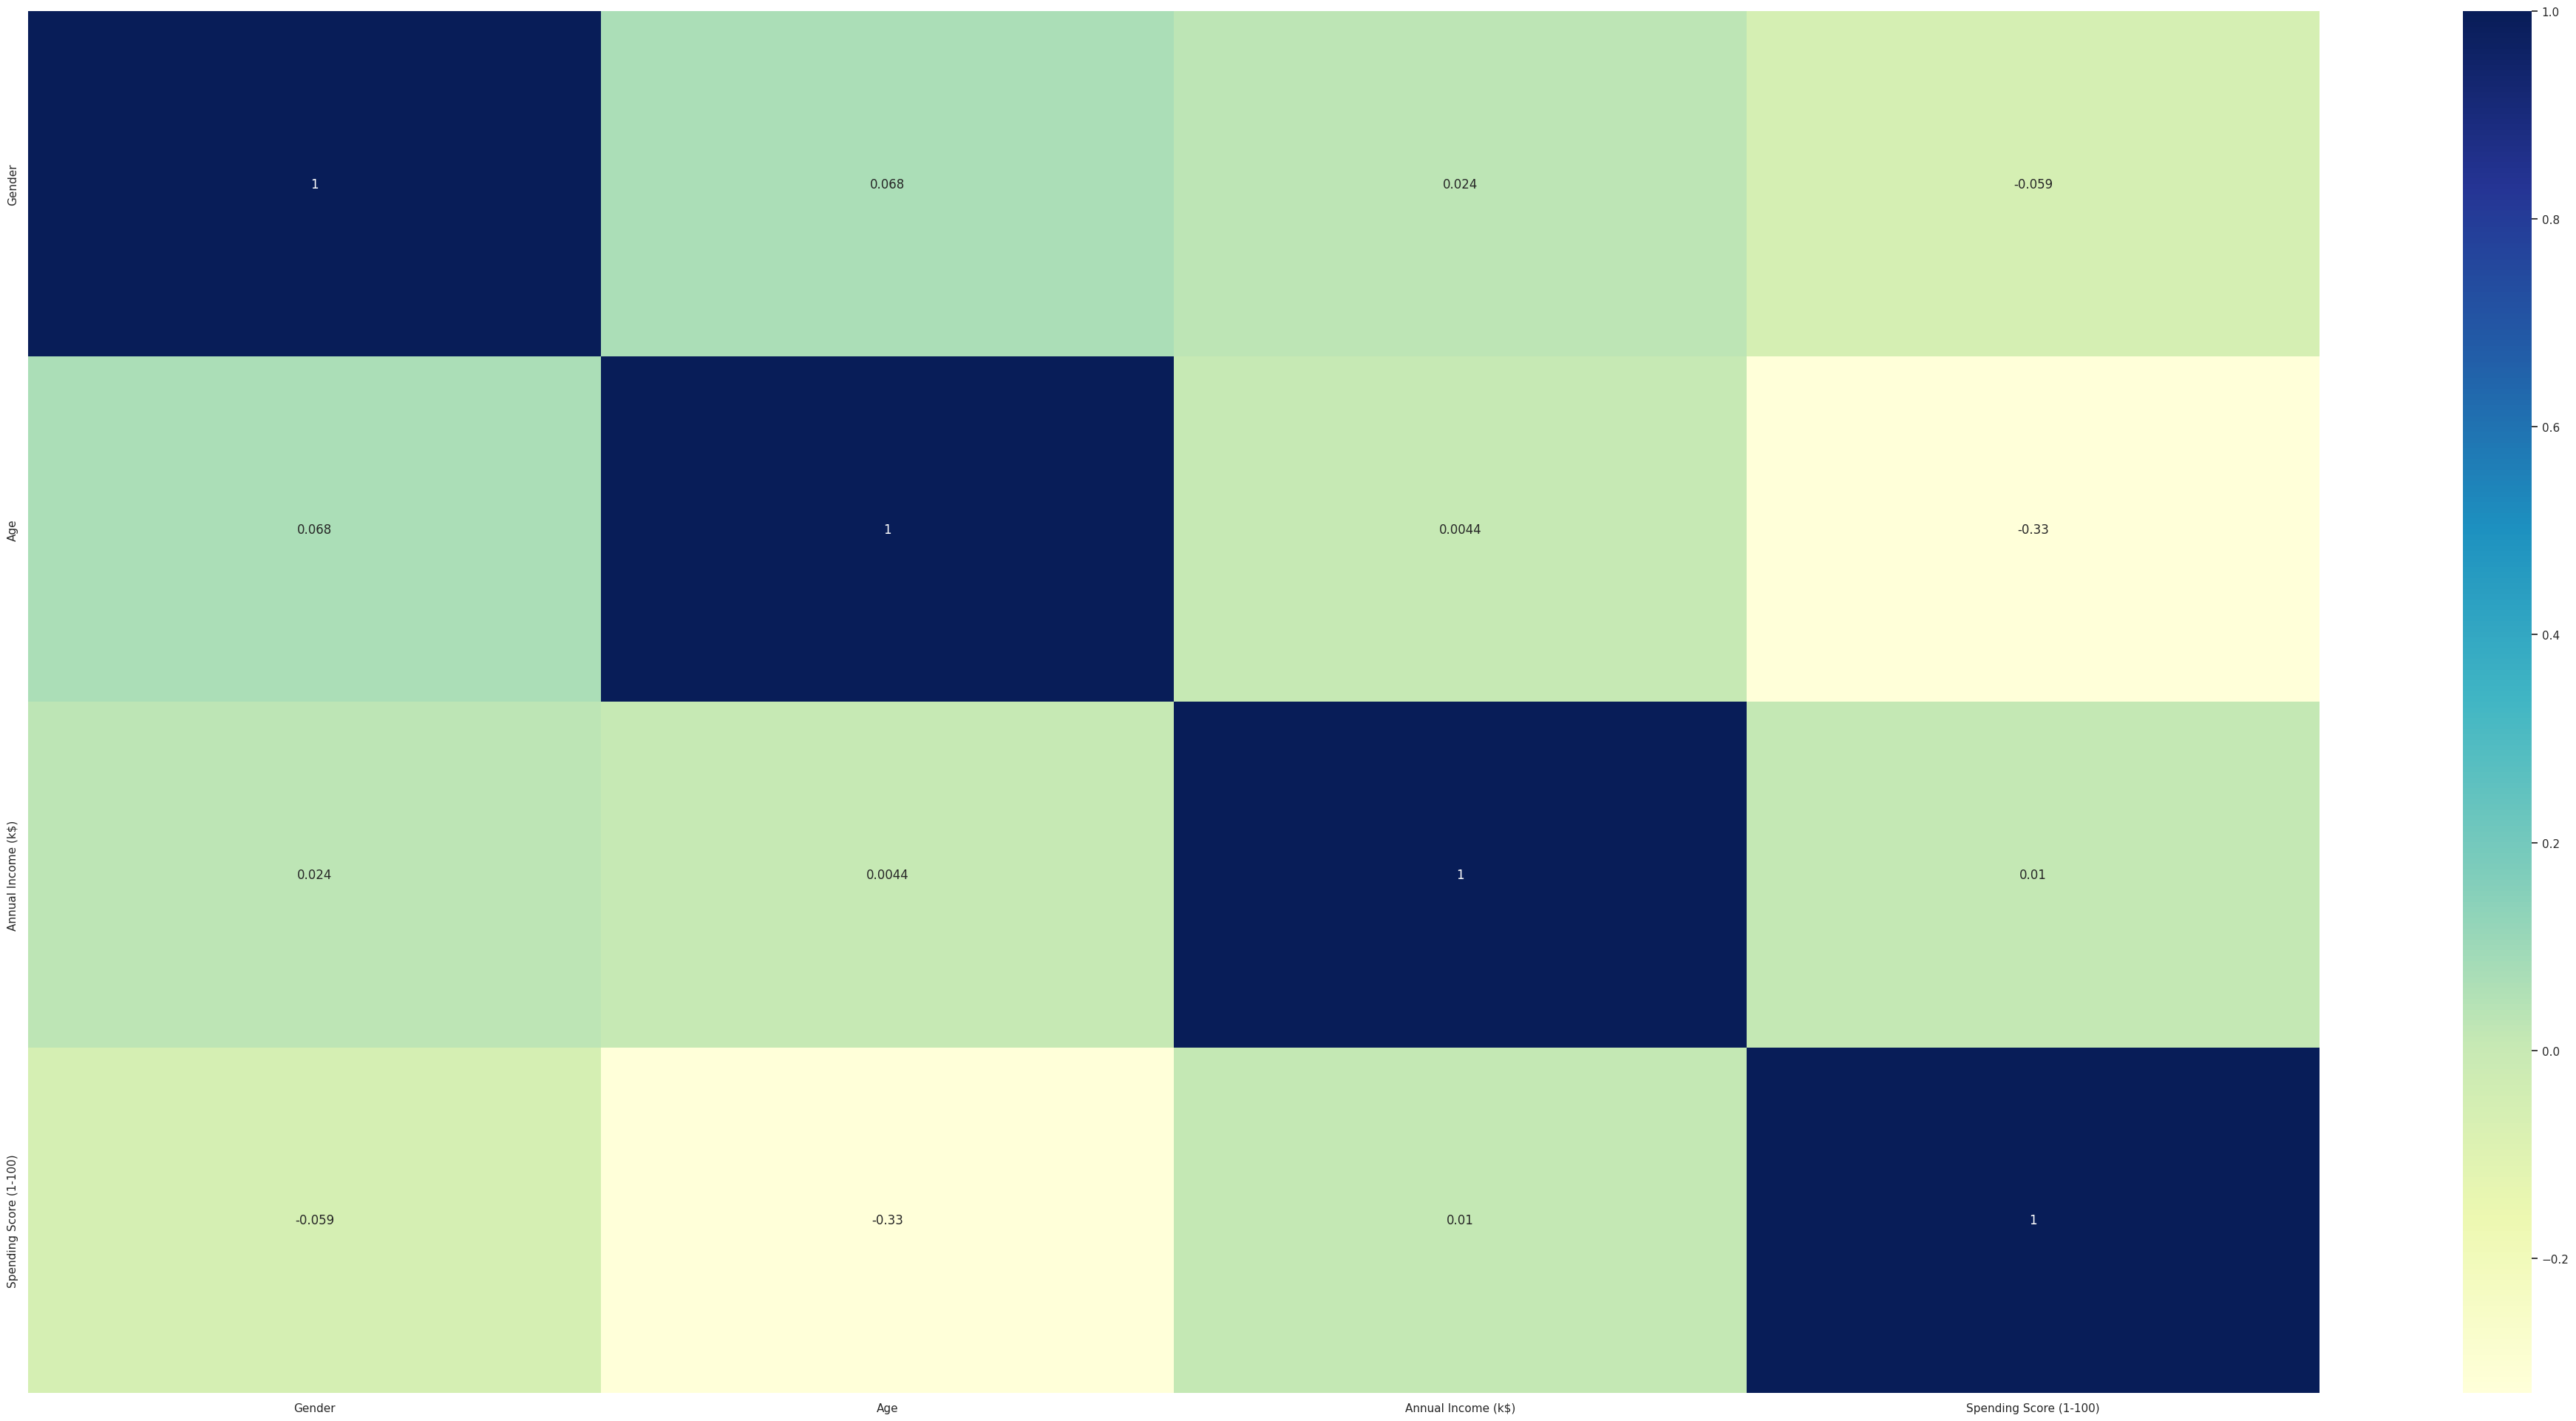

In [77]:
#Correlation investigation - correlation charts
corr = df.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

# CLUSTERING

## KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

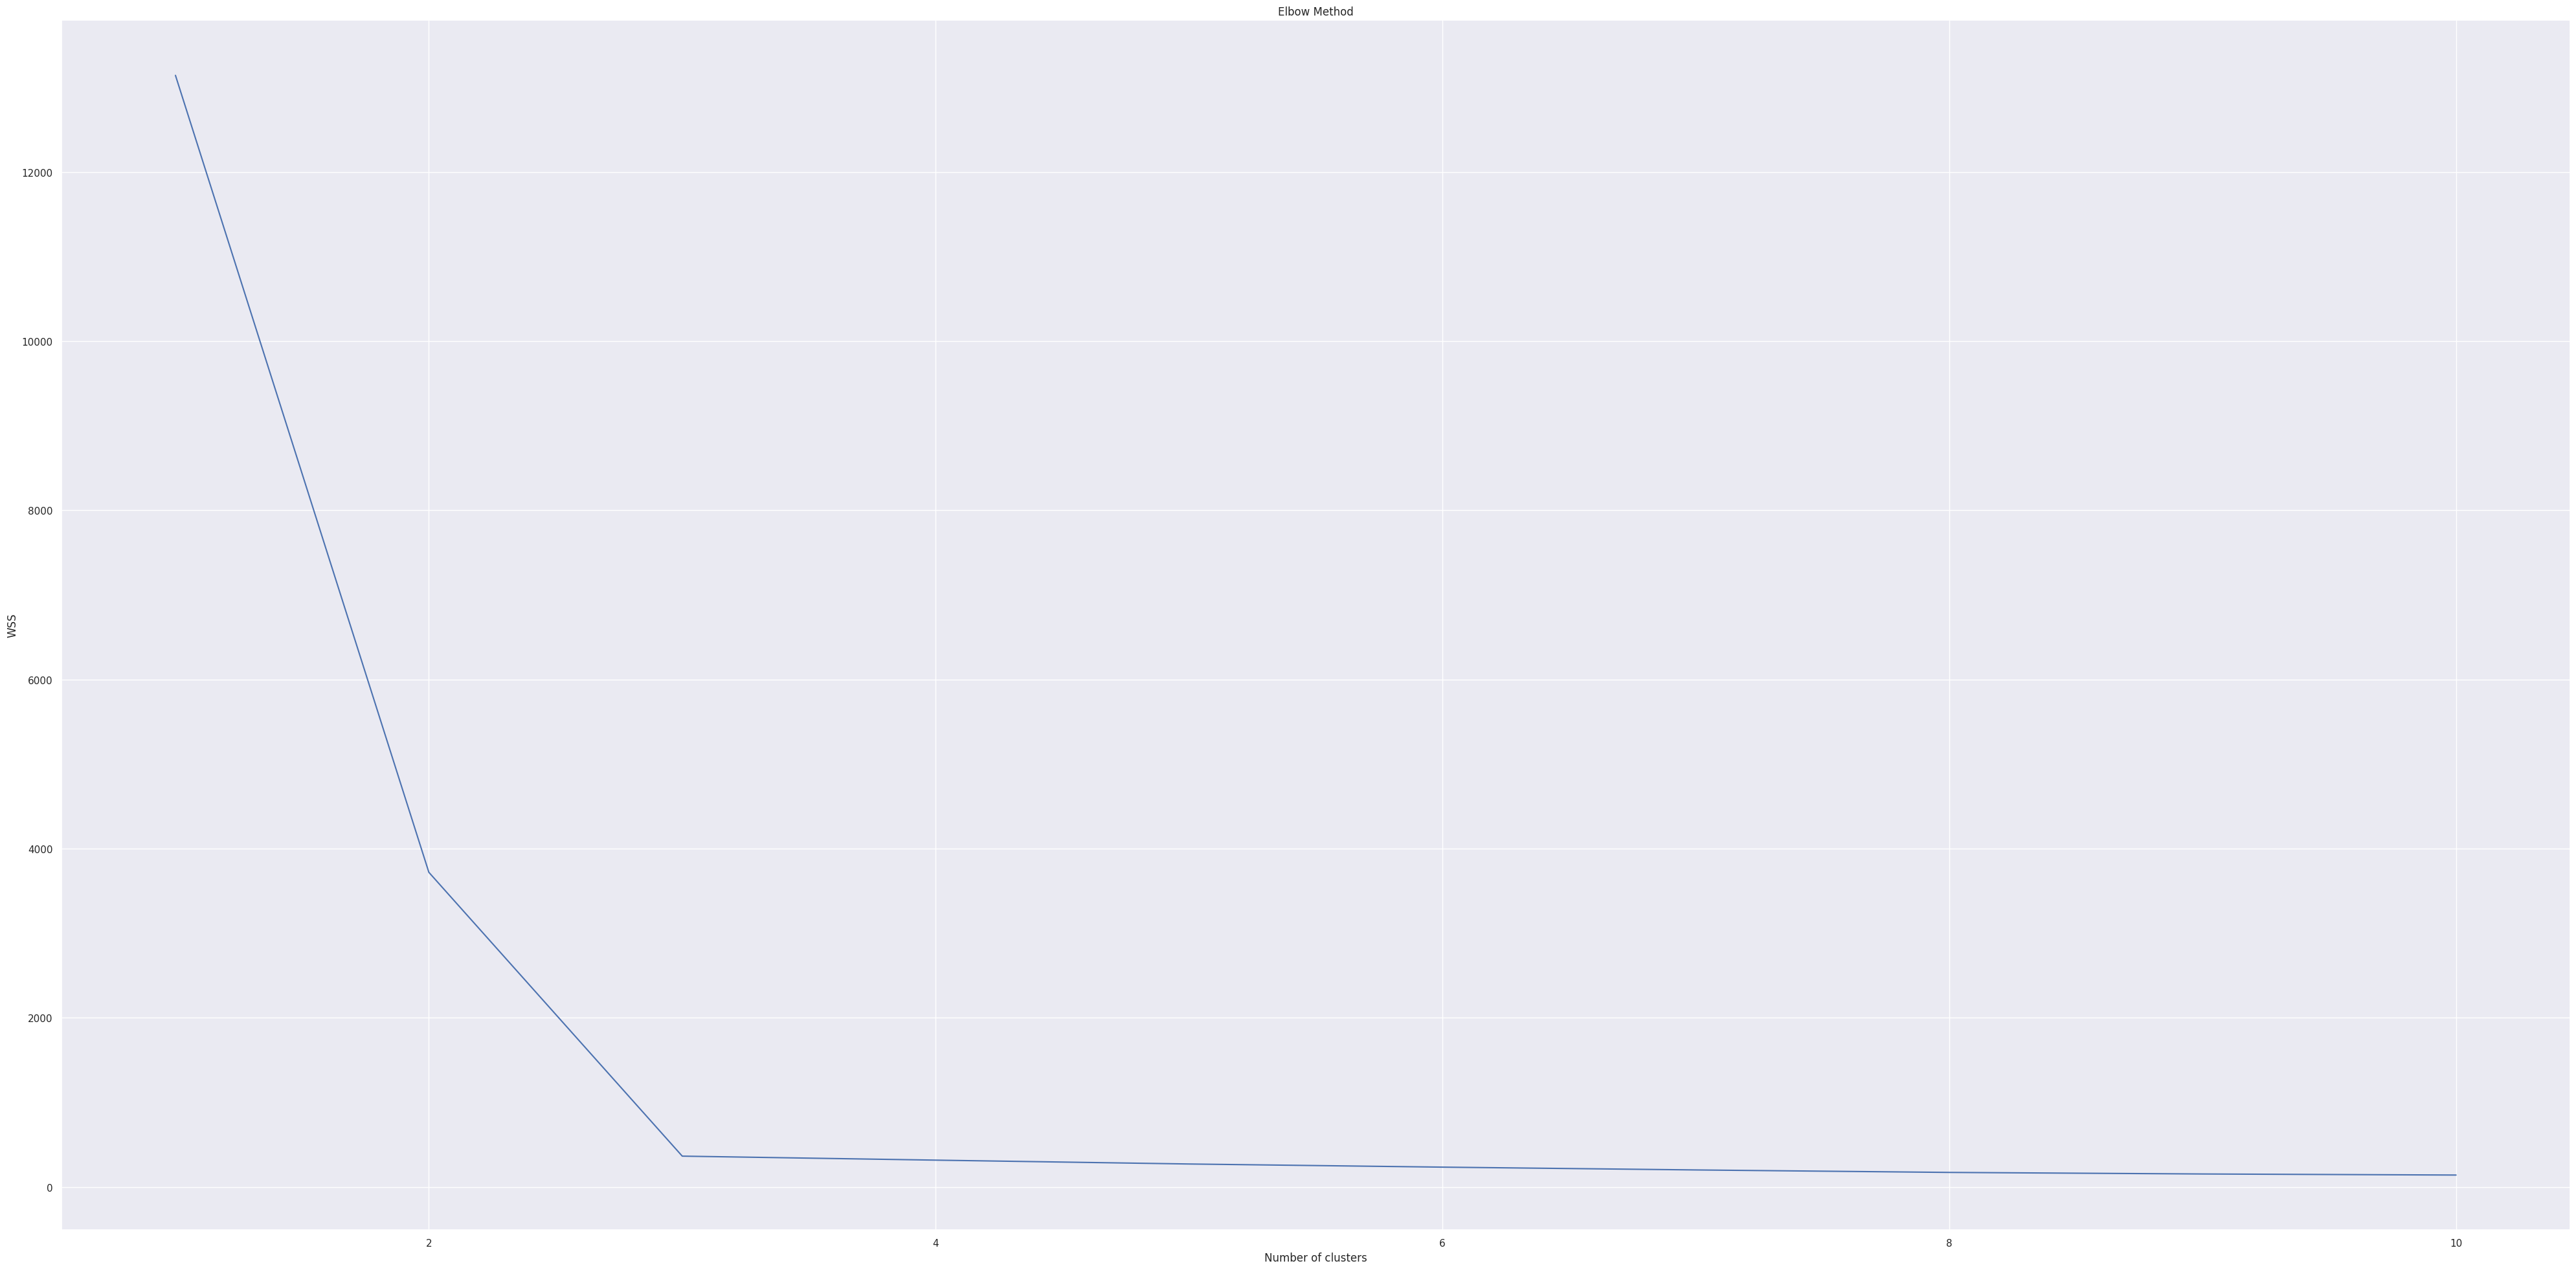

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[ 0.51351351 40.62162162 85.64864865 18.64864865]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.44736842 32.76315789 85.21052632 82.10526316]]


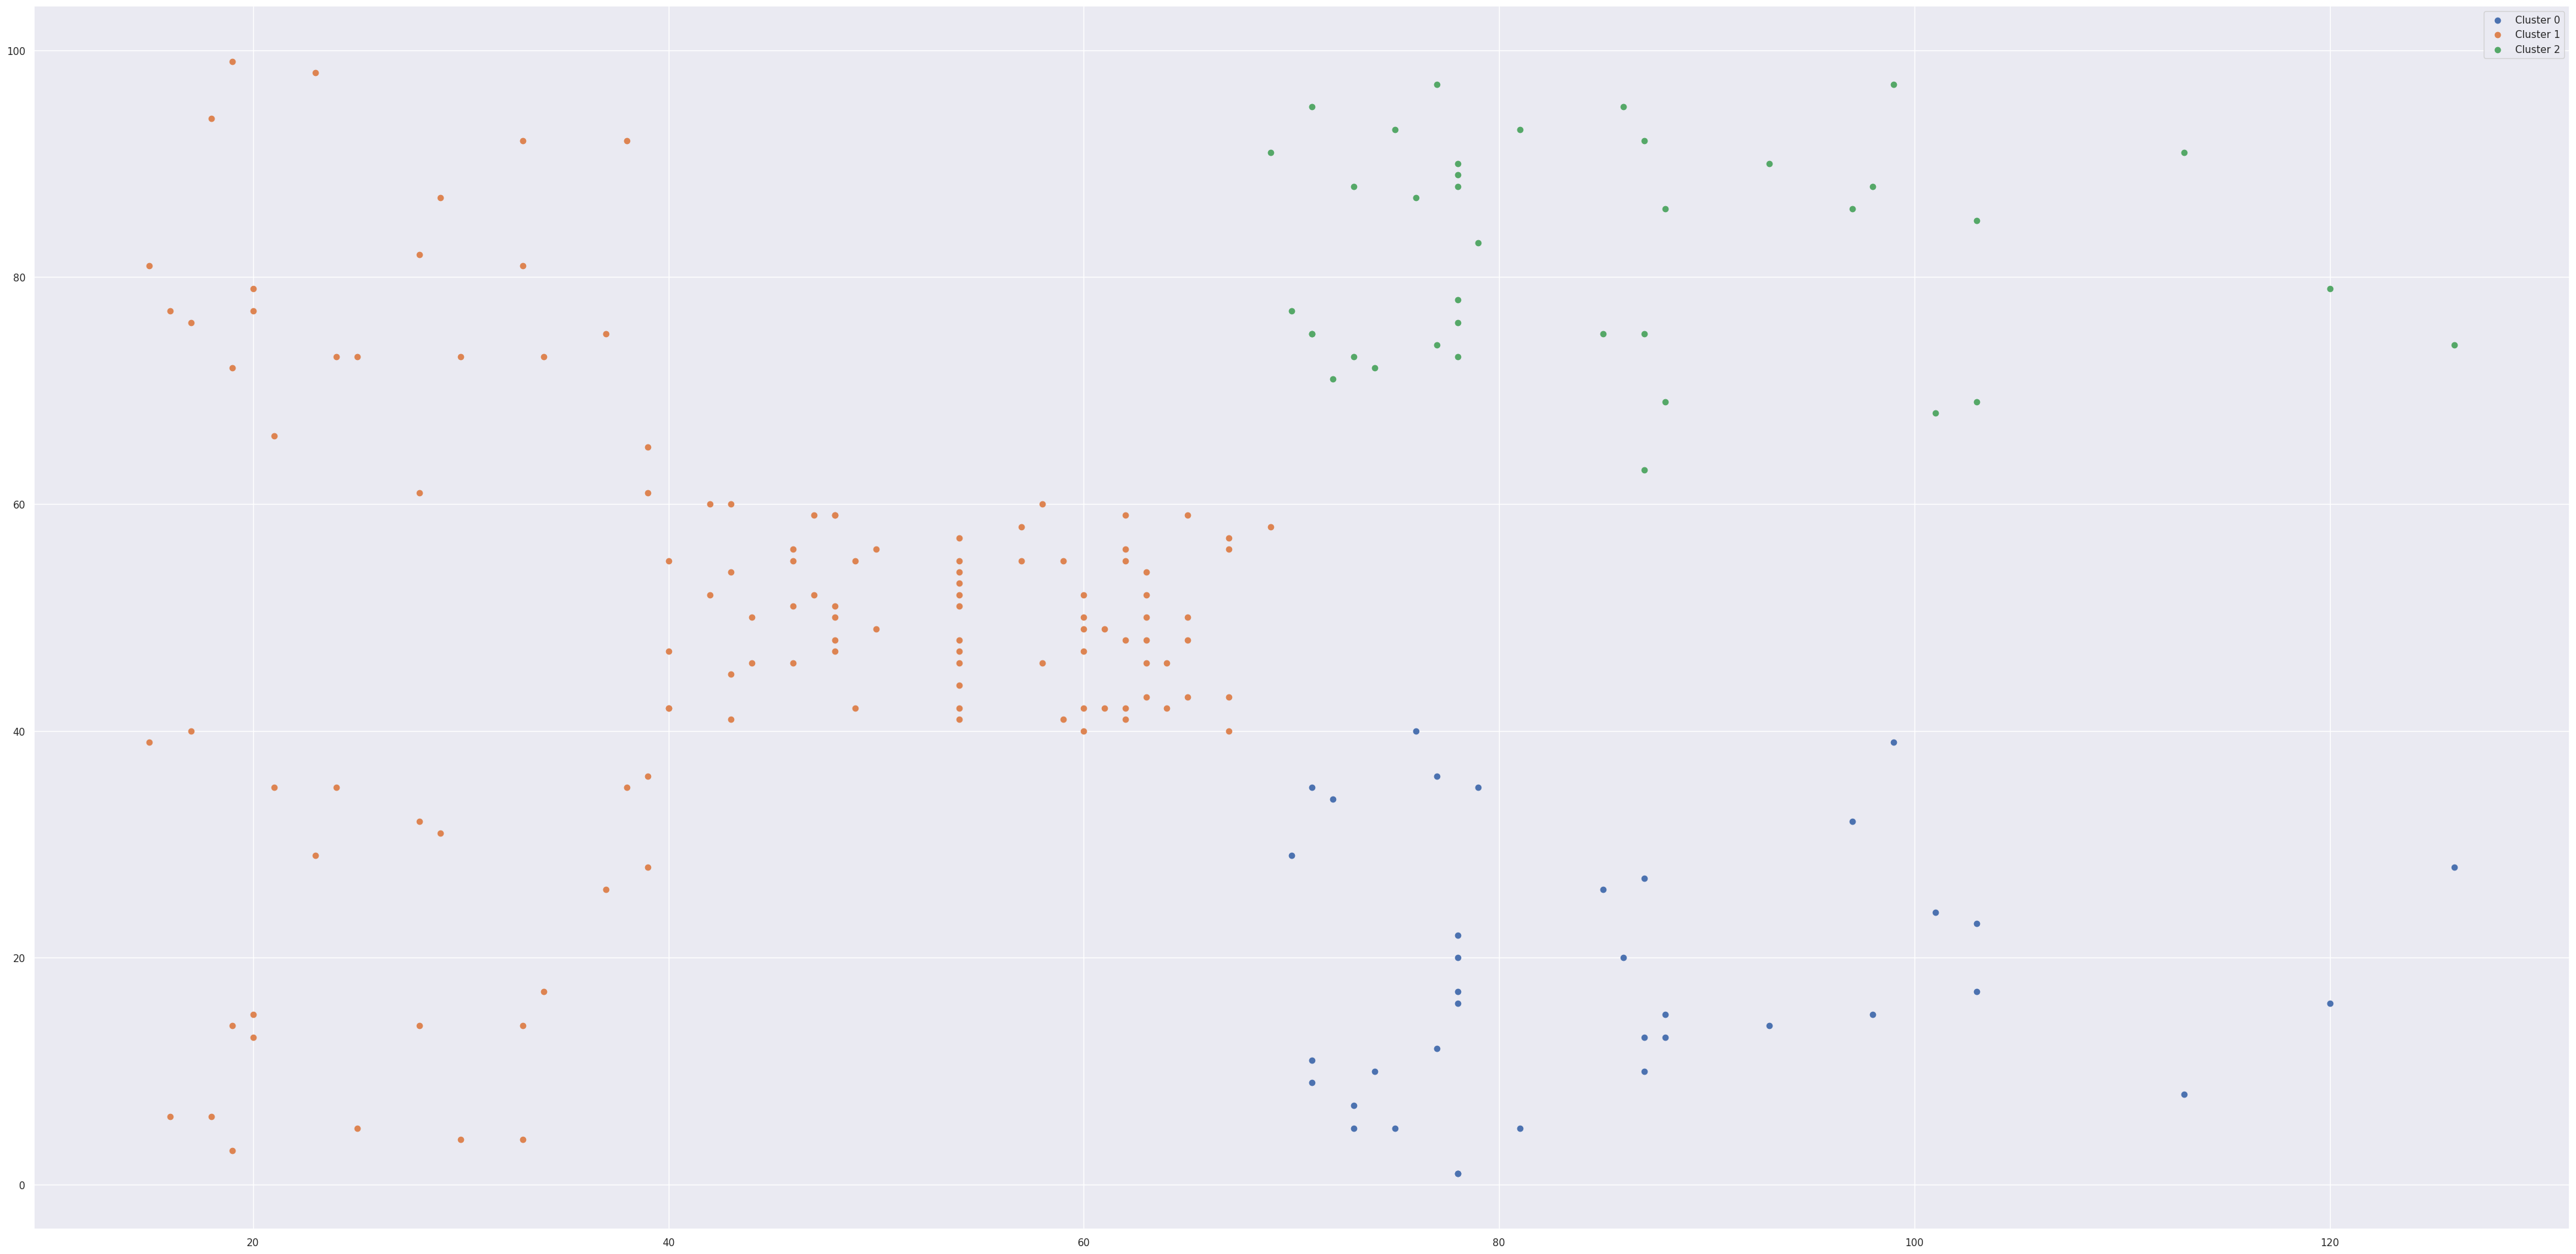

In [78]:
# Generate example data
X, y = make_blobs(n_samples=200, centers=3, random_state=42)


# Calculate WSS for k values 1 to 10
wss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  wss.append(kmeans.inertia_)


# Plot the WSS values
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

kmeans = KMeans(n_clusters=3).fit(df)
print (kmeans.labels_)
print (kmeans.cluster_centers_)

X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Add the labels as a new column to the DataFrame
df['cluster'] = labels

# Create a scatter plot for each cluster
for cluster_label in range(kmeans.n_clusters):
    plt.scatter(df[df['cluster'] == cluster_label]['Annual Income (k$)'],
                df[df['cluster'] == cluster_label]['Spending Score (1-100)'],
                label=f'Cluster {cluster_label}')
plt.legend()
plt.show()




In [79]:
#The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = kmeans.predict(X)
silhouette_avg = silhouette_score(X, labels)
print(f"The average silhouette score is {silhouette_avg:.2f}")

The average silhouette score is 0.38


In [80]:
# Calculate the Davies-Bouldin index for the clustering
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = kmeans.fit_predict(X)
davies_bouldin_index = davies_bouldin_score(X, labels)

print(f"The Davies-Bouldin index is {davies_bouldin_index:.2f}")

The Davies-Bouldin index is 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical (Agglomerative)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1]


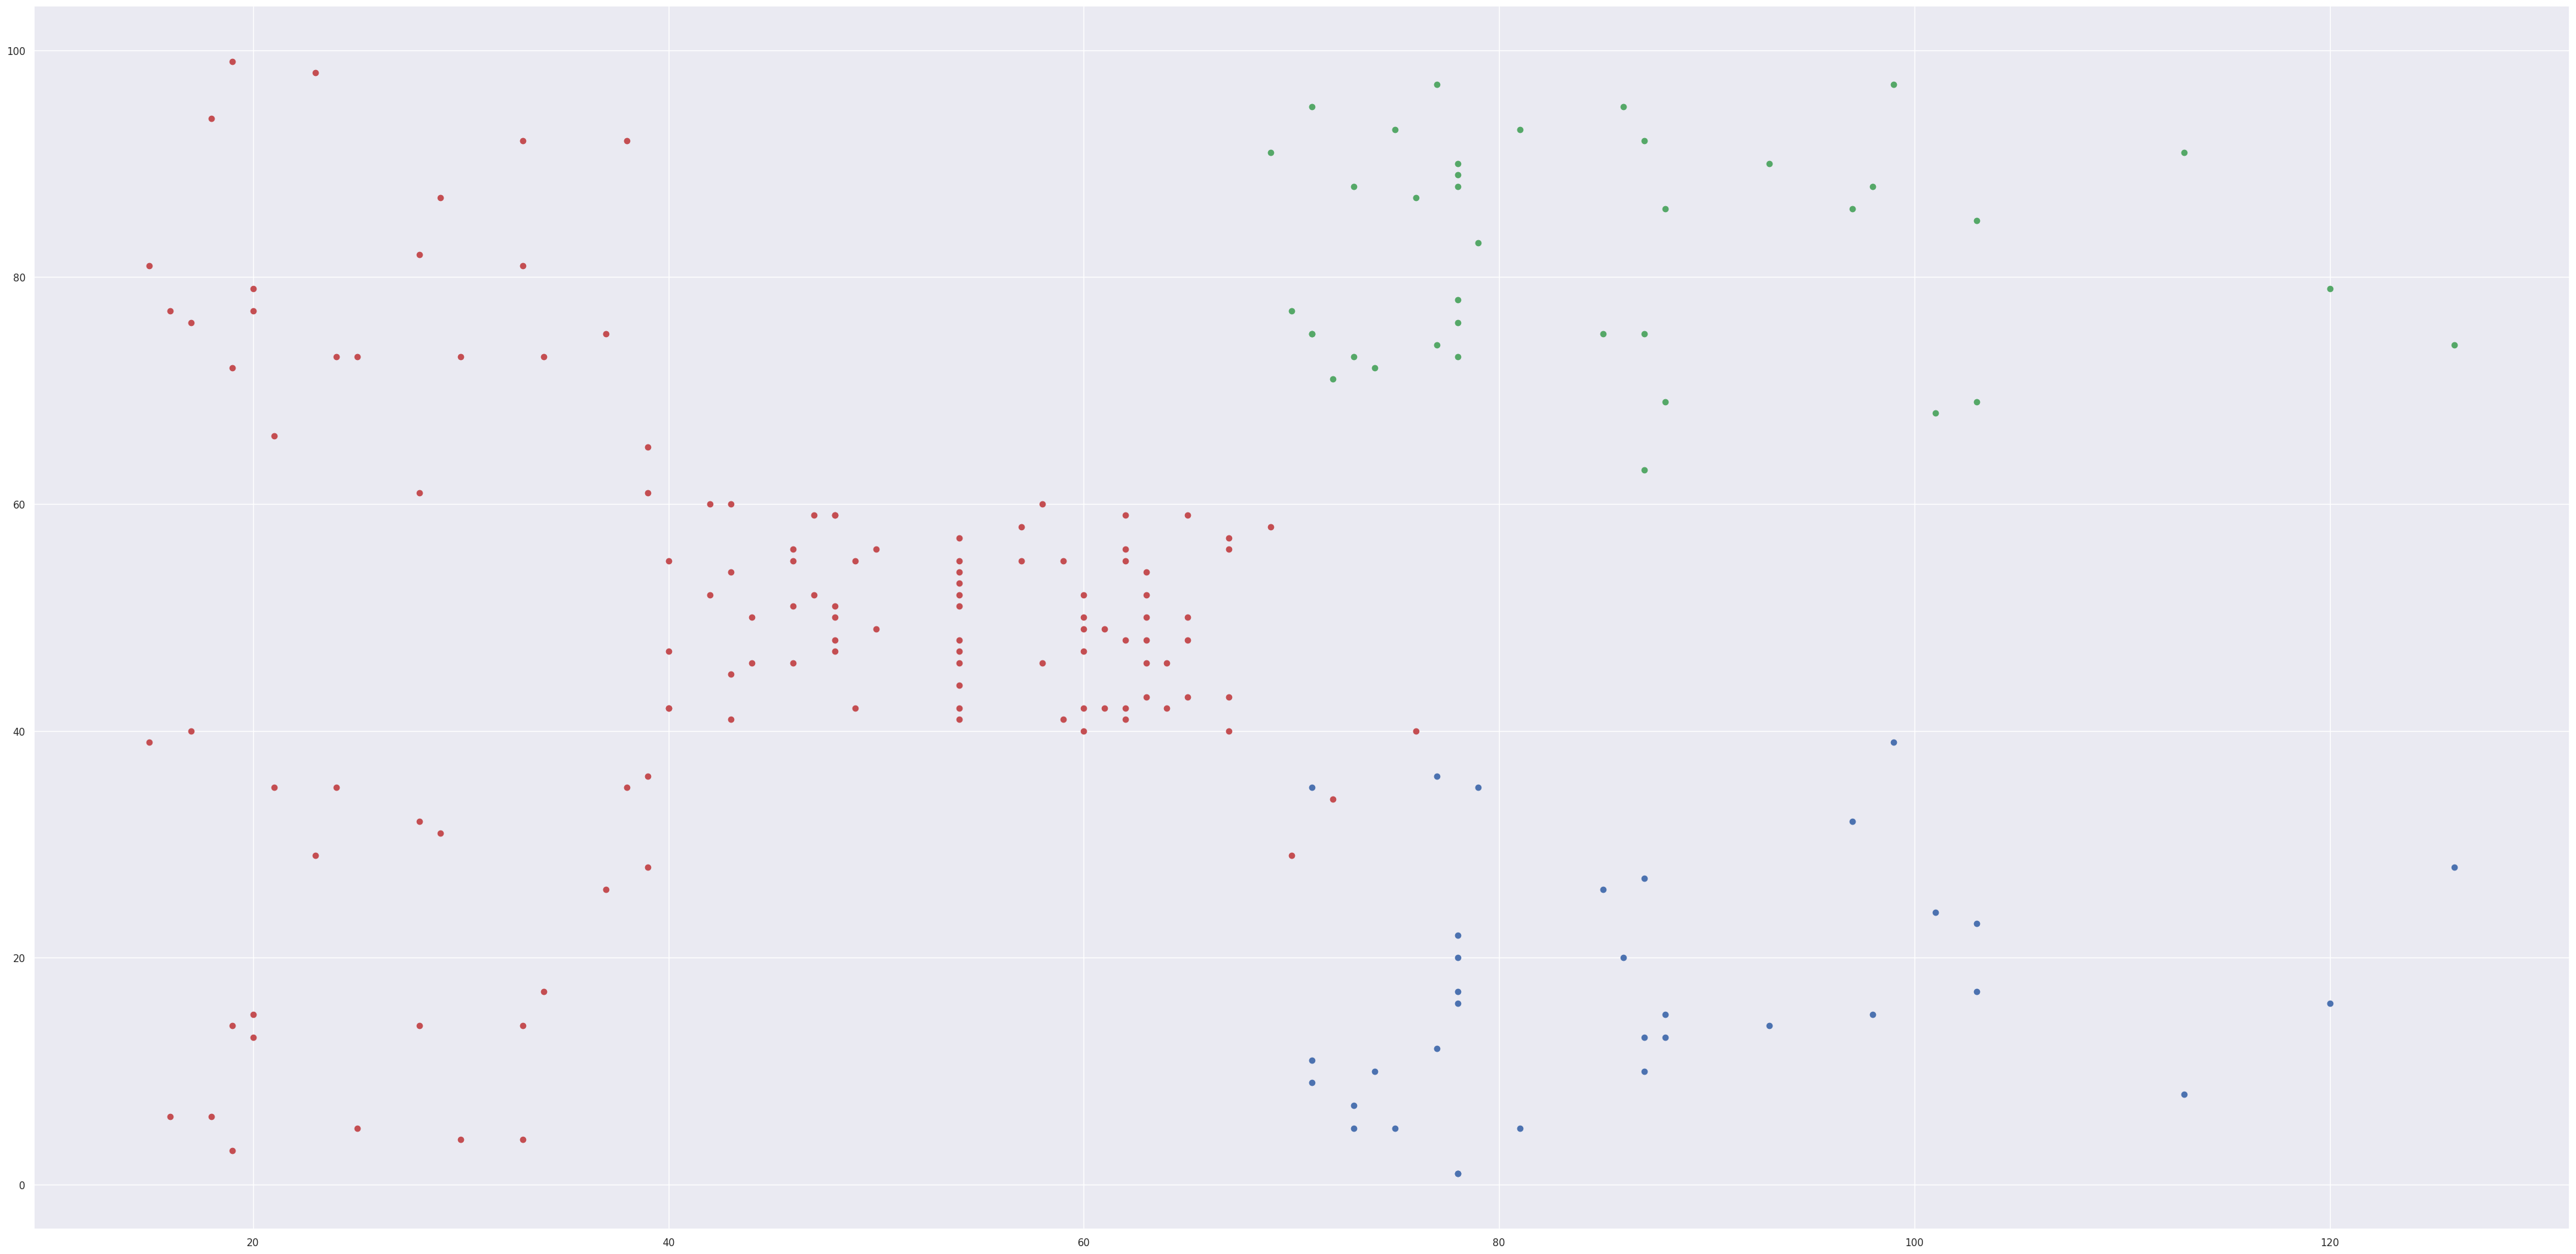

In [81]:
# Extract the relevant columns for clustering
x = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]


# Apply agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agglomerative.fit_predict(x)
print(clusters)

# Extract the relevant columns for clustering
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]


# Perform agglomerative clustering with k clusters
k = 3
agglom = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agglom.fit_predict(X)

# Visualize the output clusters with a scatter plot
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(X[labels == i]['Annual Income (k$)'], X[labels == i]['Spending Score (1-100)'], color=colors[i])
plt.show()
# For Plotting
# Perform hierarchical clustering with agglomerative clustering
#linkage_matrix = linkage(X, method='ward')
# Assign cluster labels to each data point
#labels = AgglomerativeClustering(n_clusters=3).fit_predict(X)
#  Create a scatter plot for each cluster
#  Create a dendrogram for the hierarchical clustering
# dendrogram_clusters = dendrogram(linkage_matrix, p=5, truncate_mode='level')
# for cluster_label in range(3):
#     plt.scatter(df[df['cluster'] == cluster_label]['Annual Income (k$)'], 
#                 df[df['cluster'] == cluster_label]['Spending Score (1-100)'], 
#                 label=f'Cluster {cluster_label}')
# plt.legend()
# plt.show()

In [82]:
#The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = agglom.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
print(f"The average silhouette score is {silhouette_avg:.2f}")

The average silhouette score is 0.38


In [83]:
# Calculate the Davies-Bouldin index for the clustering
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = agglom.fit_predict(X)
davies_bouldin_index = davies_bouldin_score(X, labels)

print(f"The Davies-Bouldin index is {davies_bouldin_index:.2f}")

The Davies-Bouldin index is 0.86


## Spectral Clustering

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1]


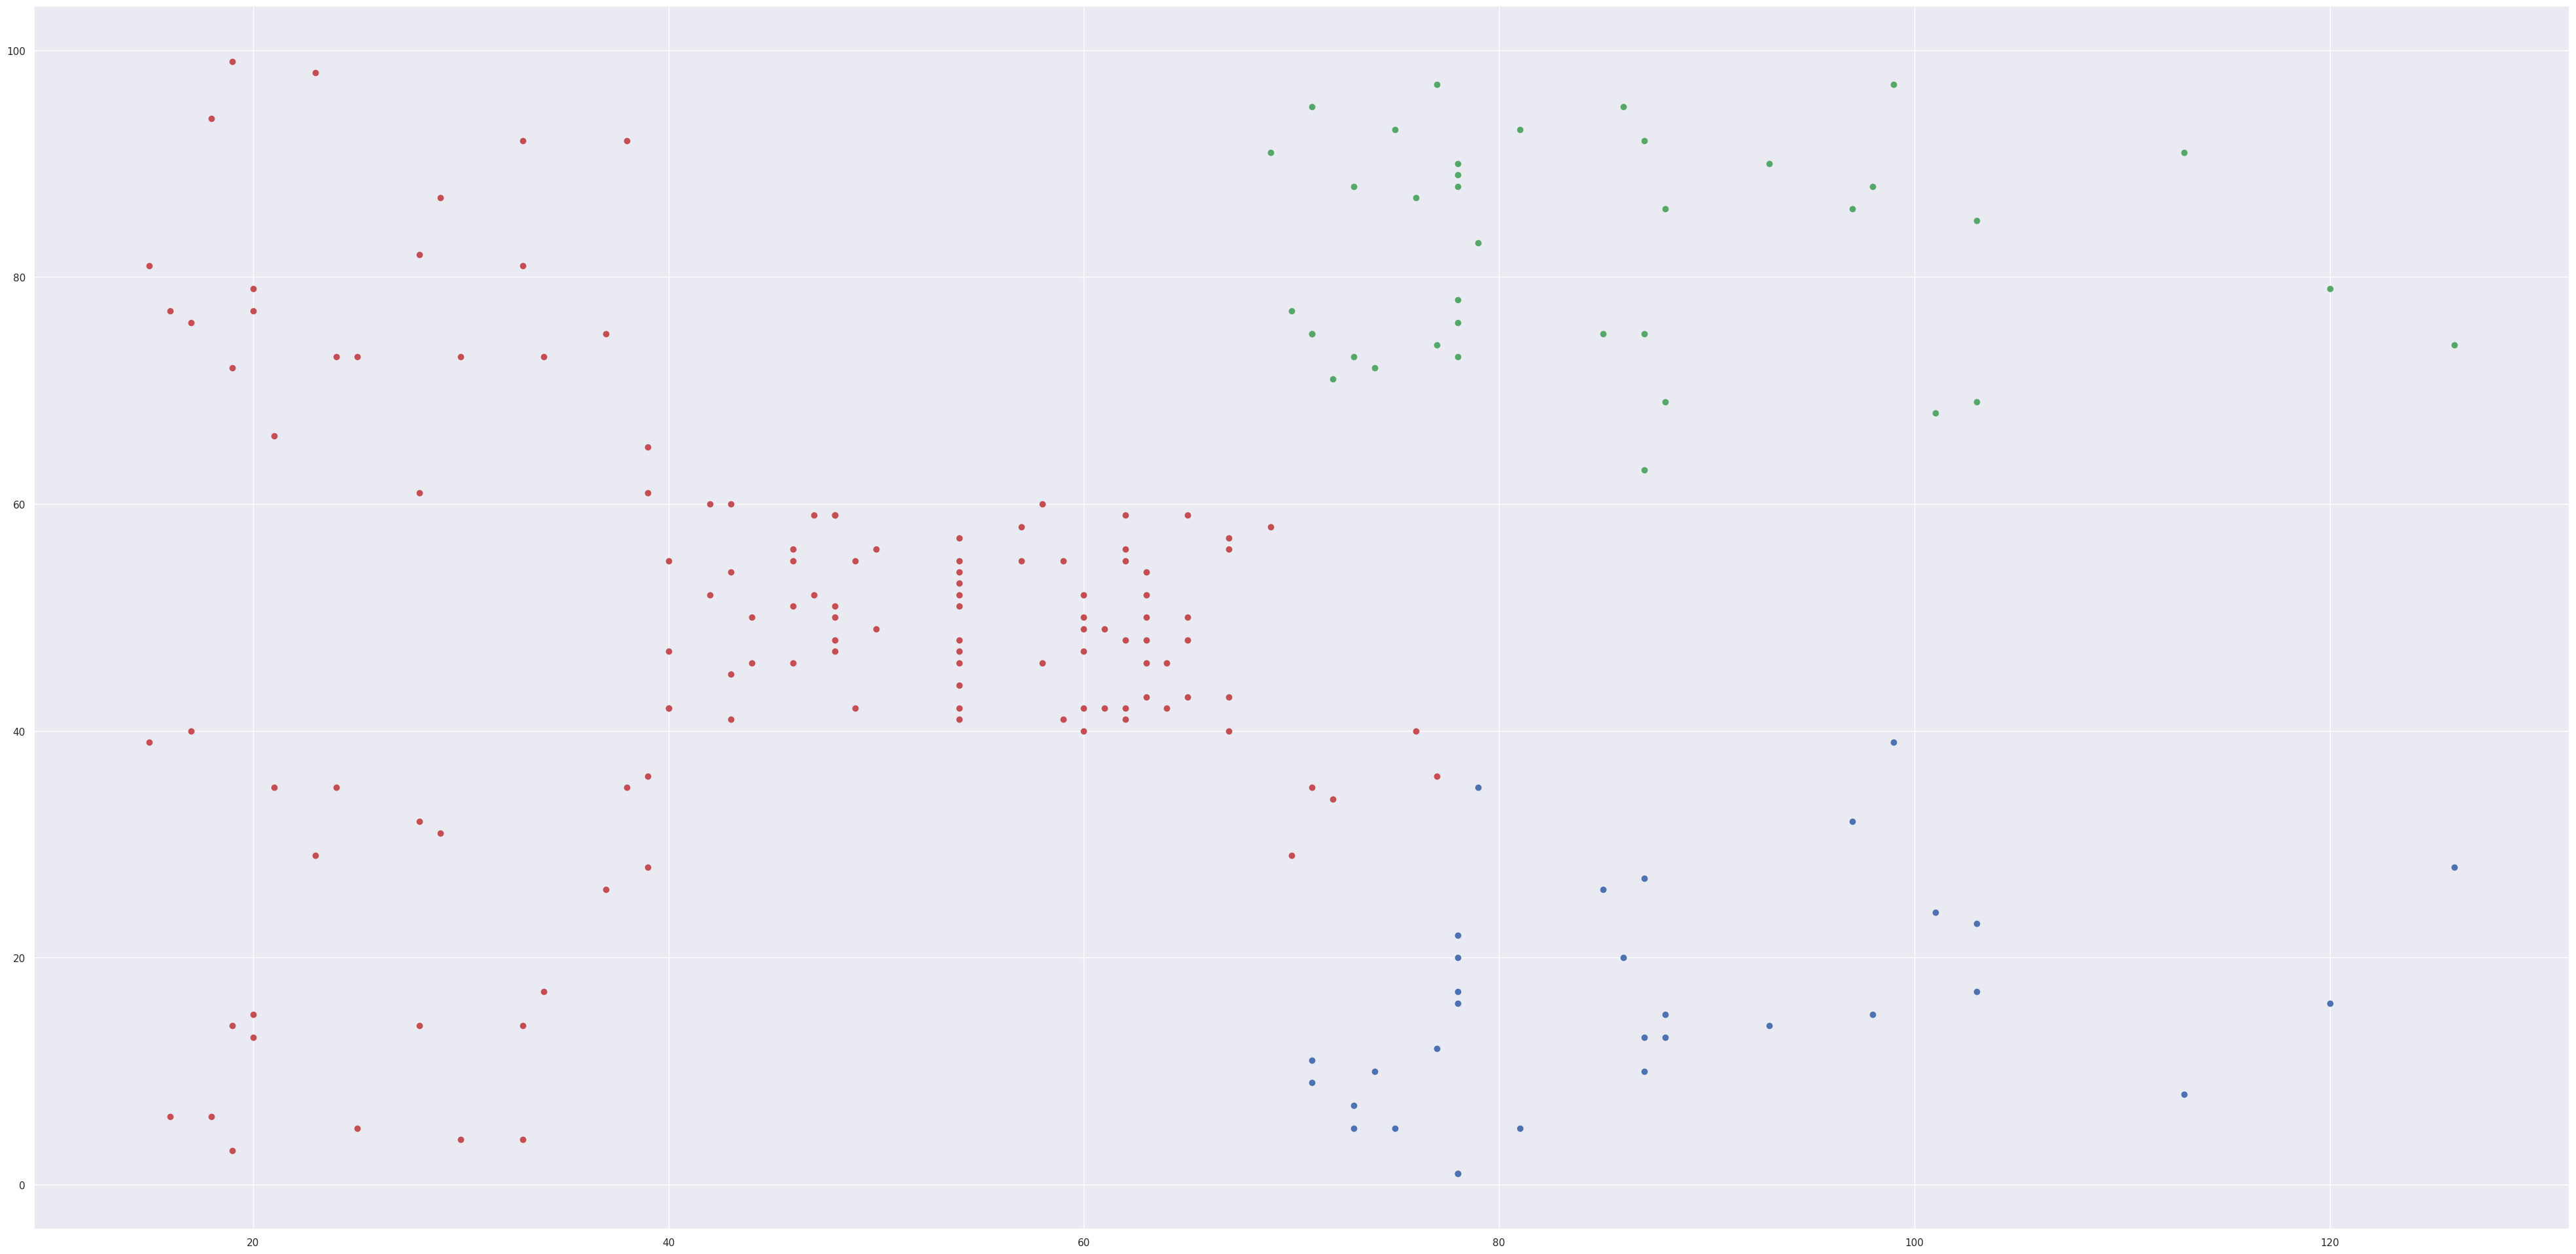

In [84]:

# Extract the relevant columns for clustering
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]

# Perform spectral clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=0.001)
labels = spectral.fit_predict(X)
clusters = spectral.fit_predict(x)
print(clusters)
# Visualize the output clusters with a scatter plot
colors = ['r', 'g', 'b', 'y', 'm', 'c']
for i in range(n_clusters):
    plt.scatter(X[labels == i]['Annual Income (k$)'], X[labels == i]['Spending Score (1-100)'], color=colors[i % len(colors)])
plt.show()



In [85]:
#The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = spectral.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
print(f"The average silhouette score is {silhouette_avg:.2f}")

The average silhouette score is 0.38


In [86]:
# Calculate the Davies-Bouldin index for the clustering
X = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
labels = spectral.fit_predict(X)
davies_bouldin_index = davies_bouldin_score(X, labels)

print(f"The Davies-Bouldin index is {davies_bouldin_index:.2f}")

The Davies-Bouldin index is 0.85


## DBSCAN

In [87]:
# Extract the relevant columns for clustering
x = df[[ 'Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=1)
clusters = dbscan.fit_predict(X_scaled)
print(dbscan.labels_)

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0]
